In [4]:
from typing import Callable, List


def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    """
    Calculate the difference quotient of a function at a given point.
    This function calculates the difference quotient of a function `f` at a given
    point `x`. The difference quotient is an approximation of the derivative of
    the function at that point.
    Parameters:
    -----------
    f : Callable[[float], float]
        The function for which to calculate the difference quotient.
    x : float
        The point at which to calculate the difference quotient.
    h : float
        The small value by which to perturb `x`.
    Returns:
    --------
    float:
        The difference quotient of the function at the given point.
    """
    return (f(x + h) - f(x)) / h

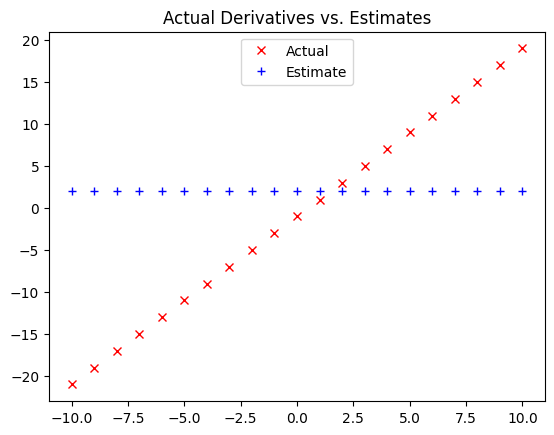

In [ ]:
import matplotlib.pyplot as plt
xs = range(-10, 11)
actuals = [2 * x - 1 for x in xs]
estimateds = [difference_quotient(lambda x: 2 * x - 1, x, h=0.001) for x in xs]

# plot to show they're basically the same
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimateds, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [5]:
def partial_difference_quotient(f: Callable[[float], float], v: List[float], i: int, h: float) -> float:
    """
    Calculate the partial difference quotient of a function at a given point.
    This function calculates the partial difference quotient of a function `f` at a given
    point `v`. The partial difference quotient is an approximation of the partial derivative
    of the function at that point with respect to the `i`-th variable.
    Parameters:
    -----------
    f : Callable[[List[float]], float]
        The function for which to calculate the partial difference quotient.
    v : List[float]
        The point at which to calculate the partial difference quotient.
    i : int
        The index of the variable with respect to which to calculate the partial derivative.
    h : float
        The small value by which to perturb the `i`-th variable.
    Returns:
    --------
    float:
        The partial difference quotient of the function at the given point.
    """
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [6]:
def estimate_gradient(f: Callable[[List[float]], float], v: List[float], h: float = 0.00001) -> List[float]:
    """
    Estimate the gradient of a function at a given point.
    This function estimates the gradient of a function `f` at a given point `v`. The gradient
    is a vector of partial derivatives of the function at that point.
    Parameters:
    -----------
    f : Callable[[List[float]], float]
        The function for which to calculate the gradient.
    v : List[float]
        The point at which to calculate the gradient.
    h : float
        The small value by which to perturb the variables.
    Returns:
    --------
    List[float]:
        The gradient of the function at the given point.
    """
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

In [7]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply


def gradient_step(v: List[float], gradient: List[float], step_size: float) -> List[float]:
    """
    Take a step in the direction of the gradient.
    This function takes a step in the direction of the gradient of a function `f` at a given
    point `v`. The step size is determined by the `step_size` parameter.
    Parameters:
    -----------
    v : List[float]
        The point at which to take a step.
    gradient : List[float]
        The gradient of the function at the given point.
    step_size : float
        The size of the step to take.
    Returns:
    --------
    List[float]:
        The new point after taking a step in the direction of the gradient.
    """
    step = scalar_multiply(step_size, gradient)
    return add(v, step)


def sum_of_squares_gradient(v: List[float]) -> List[float]:
    """
    Calculate the gradient of the sum of squares function.
    This function calculates the gradient of the sum of squares function at a given point `v`.
    The sum of squares function is a simple quadratic function that has a minimum at the origin.
    Parameters:
    -----------
    v : List[float]
        The point at which to calculate the gradient.
    Returns:
    --------
    List[float]:
        The gradient of the sum of squares function at the given point.
    """
    return [2 * v_i for v_i in v]


# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)  # compute the gradient at v
    v = gradient_step(v, grad, -0.01)  # take a negative gradient step

    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001  # v should be close to 0

0 [5.810896498582, 8.878317194215398, 5.431985944448865]
1 [5.69467856861036, 8.70075085033109, 5.323346225559888]
2 [5.580784997238153, 8.526735833324468, 5.2168793010486905]
3 [5.46916929729339, 8.356201116657978, 5.112541715027716]
4 [5.359785911347522, 8.18907709432482, 5.010290880727162]
5 [5.252590193120572, 8.025295552438322, 4.910085063112619]
6 [5.14753838925816, 7.864789641389556, 4.8118833618503665]
7 [5.0445876214729966, 7.707493848561764, 4.715645694613359]
8 [4.943695869043537, 7.553343971590529, 4.621332780721092]
9 [4.844821951662666, 7.402277092158719, 4.52890612510667]
10 [4.747925512629412, 7.254231550315544, 4.438328002604536]
11 [4.652967002376824, 7.109146919309233, 4.349561442552446]
12 [4.559907662329288, 6.966963980923048, 4.262570213701397]
13 [4.468709509082703, 6.827624701304587, 4.177318809427369]
14 [4.379335318901049, 6.691072207278495, 4.093772433238822]
15 [4.291748612523028, 6.557250763132925, 4.0118969845740455]
16 [4.205913640272567, 6.42610574787026